In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
FD = pd.read_csv(r"C:\Users\Ameen\Desktop\MyProjects-P\Fraud Detection\archive\creditcard.csv")
FD.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [94]:
FD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
def reduce_memory(ds):
#reduce memory usage by converting data types

    for col in ds.columns:
        col_type = ds[col].dtype

        if "int" in str(col_type):
            ds[col] = ds[col].astype("int32")

        elif "float" in str(col_type):
            ds[col] = ds[col].astype("float32")

    return ds

In [96]:
FD = reduce_memory(FD)
FD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 non-null  float32
 6   V6      284807 non-null  float32
 7   V7      284807 non-null  float32
 8   V8      284807 non-null  float32
 9   V9      284807 non-null  float32
 10  V10     284807 non-null  float32
 11  V11     284807 non-null  float32
 12  V12     284807 non-null  float32
 13  V13     284807 non-null  float32
 14  V14     284807 non-null  float32
 15  V15     284807 non-null  float32
 16  V16     284807 non-null  float32
 17  V17     284807 non-null  float32
 18  V18     284807 non-null  float32
 19  V19     284807 non-null  float32
 20  V20     284807 non-null  float32
 21  V21     28

In [97]:
FD.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05,284807.000000,284807.000000,284807.000000,2.848070e+05,284807.000000,...,284807.000000,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859375,-1.371543e-08,-4.286071e-09,0.000000,-6.857714e-09,0.000000,0.000000,0.000000,3.428857e-09,0.000000,...,0.000000,6.857714e-09,0.000000,0.000000,0.000000,0.000000,1.071518e-10,2.143036e-10,88.349617,0.001727
std,47487.195312,1.958611e+00,1.651183e+00,1.516203,1.415832e+00,1.380180,1.332214,1.237020,1.194202e+00,1.098575,...,0.734470,7.256873e-01,0.624410,0.605602,0.521262,0.482215,4.035722e-01,3.300574e-01,250.071564,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-48.325588,-5.683171e+00,-113.743309,-26.160505,-43.557243,-7.321672e+01,-13.434067,...,-34.830383,-1.093314e+01,-44.807735,-2.836627,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-0.890365,-8.486401e-01,-0.691597,-0.768296,-0.554076,-2.086297e-01,-0.643098,...,-0.228395,-5.423504e-01,-0.161846,-0.354586,-0.317145,-0.326984,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,0.179846,-1.984653e-02,-0.054336,-0.274187,0.040103,2.235804e-02,-0.051429,...,-0.029450,6.781943e-03,-0.011193,0.040976,0.016594,-0.052139,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196,7.433413e-01,0.611926,0.398565,0.570436,3.273458e-01,0.597139,...,0.186377,5.285536e-01,0.147642,0.439527,0.350716,0.240952,9.104512e-02,7.827995e-02,77.165001,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382559,1.687534e+01,34.801666,73.301628,120.589493,2.000721e+01,15.594995,...,27.202839,1.050309e+01,22.528412,4.584549,7.519588,3.517346,3.161220e+01,3.384781e+01,25691.160156,1.000000


Time      V1          V2          V3         V4         V5         V6         V7          V8          V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount      Class
163152.0  -1.196037    1.585949    2.883976   3.378471   1.511706   3.717077   0.585362   -0.156001    0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294    0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0.858197  7.560000    0        0.000063
          -1.203617    1.574009    2.889277   3.381404   1.538663   3.698747   0.560211   -0.150911    0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727    0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.04

<Axes: xlabel='Class', ylabel='count'>

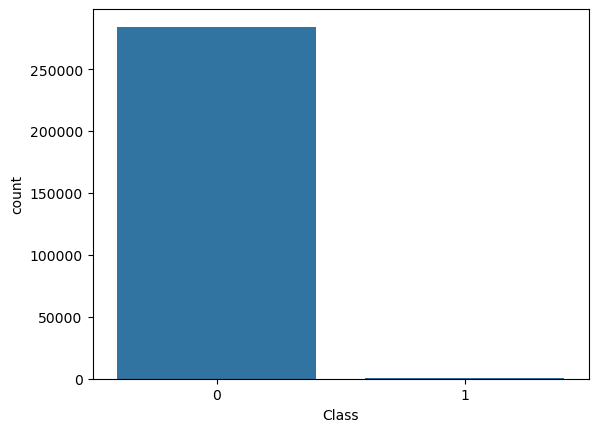

In [ ]:
#show the percentage of each class (fraud vs non-fraud)
print(FD.value_counts(normalize = True))

#visualize class distribution
sns.countplot(x = 'Class' , data = FD)

#the dataset is highly imbalanced:
#fraud transactions are less than 1% of the data

In [99]:
FD['Amount'].describe()


count    284807.000000
mean         88.349617
std         250.071564
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165001
max       25691.160156
Name: Amount, dtype: float64

In [ ]:
#compare transaction amounts between normal and fraud transactions
#this helps us see if fraud amounts behave differently

FD.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291023,250.058838,0.0,5.65,22.00,77.050003,25691.160156
1,492.0,122.211319,256.683289,0.0,1.00,9.25,105.889999,2125.870117


<Axes: xlabel='Class', ylabel='Amount'>

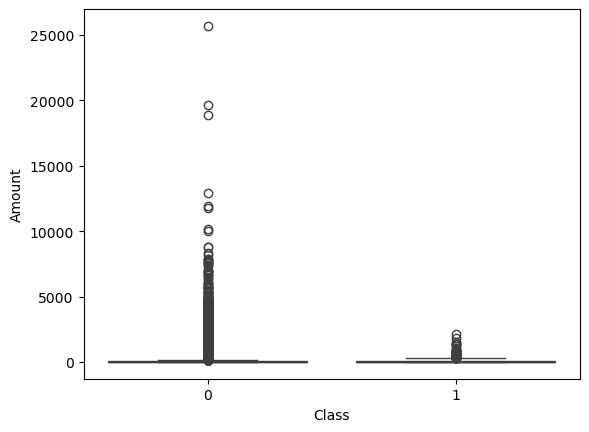

In [ ]:
sns.boxplot(x = 'Class' , y = 'Amount' , data = FD)

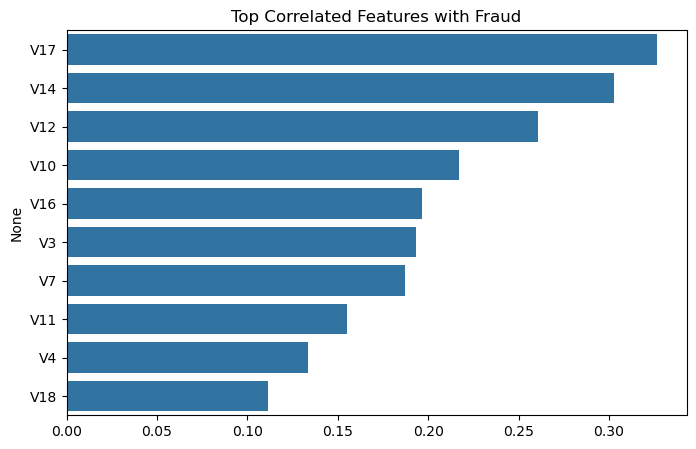

In [ ]:
corr = FD.corr()['Class'].sort_values(ascending = False)

top_corr = corr.drop('Class').abs().sort_values(ascending = False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_corr.values , y = top_corr.index)
plt.title('Top Correlated Features with Fraud')
plt.show()


In [103]:
x = FD.drop("Class" , axis = 1)
y = FD["Class"]

In [104]:
scaler = StandardScaler()

x["Amount"] = scaler.fit_transform(FD[["Amount"]])

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , stratify = y , random_state = 42)

In [ ]:
#logistic Regression was selected as a strong and interpretable baseline.
#more complex models were not prioritized since the main challenge is extreme class imbalance rather than model capacity.


LoRparam_grid = {
    "logisticregression__C": [0.001 , 0.01 , 0.1 , 1 , 10] ,
    "logisticregression__penalty": ['l1' , 'l2']
}

LoR_pip = make_pipeline(
    (LogisticRegression(
        class_weight = 'balanced' ,
        solver = 'liblinear' ,
        max_iter = 1000
    ))
)
LoR_grid_search = GridSearchCV(
    estimator = LoR_pip ,
    param_grid = LoRparam_grid ,
    scoring = "f1" ,
    cv = 5 ,
    n_jobs = -1
)

LoR_grid_search.fit(x_train , y_train)

print("\nBest Score:" , LoR_grid_search.best_score_)
print("Best Parameters:" , LoR_grid_search.best_params_)


Best Score: 0.12472575871669103
Best Parameters: {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l1'}


In [ ]:
#get the best hyperparameters from GridSearch
best_C = LoR_grid_search.best_params_["logisticregression__C"]
best_P = LoR_grid_search.best_params_["logisticregression__penalty"]

#build the final Logistic Regression model using the best parameters
final_LoR_pipeline = make_pipeline(
    LogisticRegression(
        solver = 'liblinear' ,
        C = best_C ,
        penalty = best_P ,
        class_weight = 'balanced' ,  #handle class imbalance
        random_state = 42 ,
        n_jobs = -1
    )
)

#train the final model on the training data
final_LoR_pipeline.fit(x_train , y_train)

#get probability predictions for the positive class (fraud = 1)
y_probs = final_LoR_pipeline.predict_proba(x_test)[: , 1]

#try different decision thresholds
for t in [0.5 , 0.3 , 0.2 , 0.1]:
    
    #convert probabilities to class labels based on threshold
    y_pred = (y_probs >= t).astype(int)
    
    print(f"\nThreshold: {t}")
    
    #show confusion matrix
    print(confusion_matrix(y_test , y_pred))
    print()
    
    #show precision, recall, and f1-score
    print(classification_report(y_test , y_pred))


c:\Users\Ameen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(



Threshold: 0.5
[[55571  1293]
 [    8    90]]

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962


Threshold: 0.3
[[53472  3392]
 [    8    90]]

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.03      0.92      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.93      0.51     56962
weighted avg       1.00      0.94      0.97     56962


Threshold: 0.2
[[50392  6472]
 [    6    92]]

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     56864
           1       0.01      0.94      0.03        98

    accuracy                          

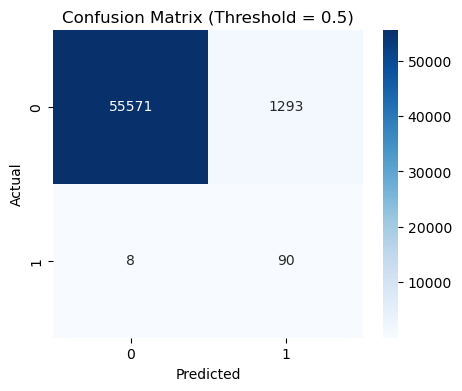

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
#choose final threshold

threshold = 0.5
y_pred = (y_probs >= threshold).astype(int)

#confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()

#classification Report
print(classification_report(y_test , y_pred))

In [ ]:
coeffs = final_LoR_pipeline.named_steps['logisticregression'].coef_[0]
features = x_train.columns

importance = pd.Series(coeffs , index = features).sort_values(key = abs , ascending = False)

importance.head(10)

#shows which features contribute most to fraud prediction

V14   -0.721092
V4     0.697654
V12   -0.365531
V13   -0.317135
V10   -0.311627
V22    0.302487
V8    -0.288848
V16   -0.247119
V3    -0.227646
V5     0.204309
dtype: float64